In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd

from gam import gam


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dask.distributed import Client

In [4]:
client = Client(memory_limit="auto")

In [5]:
client

<Client: 'tcp://127.0.0.1:58506' processes=4 threads=4, memory=4.29 GB>

In [6]:
import dask.dataframe as dd
ddf = dd.read_csv('data/mushroom-attributions-200-samples.csv').repartition(npartitions=4)

In [7]:
ddf.values

dask.array<values, shape=(nan, 22), dtype=float64, chunksize=(nan, 22), chunktype=numpy.ndarray>

In [8]:
g = gam.GAM(attributions = ddf, k=3, max_iter=0)
g.generate()

Max Iterations:  0
Starting Iteration:  1


In [9]:
client.close()

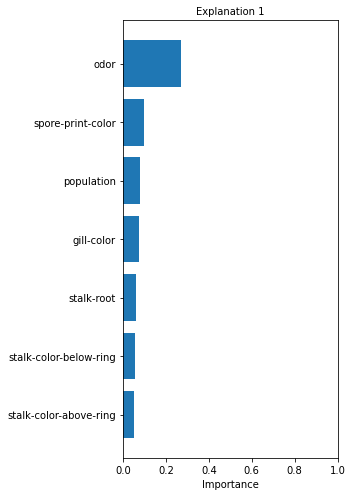

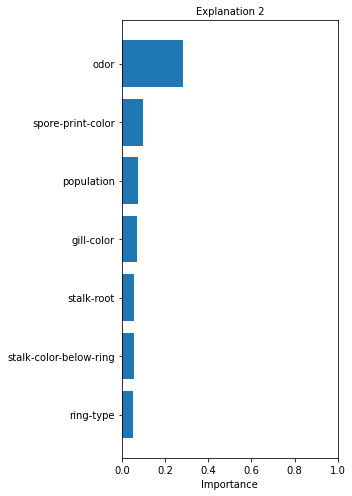

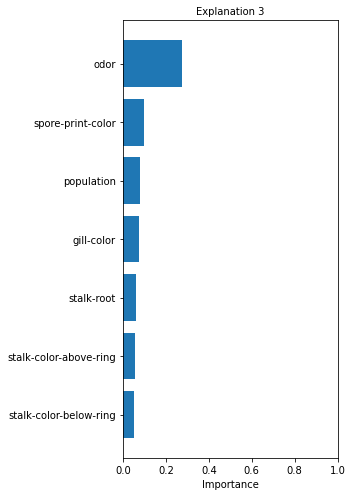

In [10]:
g.plot(num_features=7)

In [11]:
g.subpopulation_sizes

[56, 65, 79]

In [12]:
g.explanations

[[('cap-shape', 0.01380615596997601),
  ('cap-surface', 0.0023589835827245017),
  ('cap-color', 0.04355883555368673),
  ('bruises', 0.0052522105719211044),
  ('odor', 0.26895759497402333),
  ('gill-attachment', 0.0027145585292446023),
  ('gill-spacing', 0.02852390673900572),
  ('gill-size', 0.03572959991832823),
  ('gill-color', 0.07559960428786205),
  ('stalk-shape', 0.03231793161929743),
  ('stalk-root', 0.062477023865838546),
  ('stalk-surface-above-ring', 0.02873851609358442),
  ('stalk-surface-below-ring', 0.015637154699266215),
  ('stalk-color-above-ring', 0.052037947446961344),
  ('stalk-color-below-ring', 0.05455570088209524),
  ('veil-type', 0.0),
  ('veil-color', 0.0070683656521457056),
  ('ring-number', 0.010637867575487708),
  ('ring-type', 0.04325699562300273),
  ('spore-print-color', 0.10018908689140468),
  ('population', 0.07807431398394936),
  ('habitat', 0.03850764554019453)],
 [('cap-shape', 0.013075414821865416),
  ('cap-surface', 0.006794783924350109),
  ('cap-color